# Time Series forecasting using prophet

In [2]:
# pip install prophet

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import sklearn
import seaborn as sns
import pickle
import tensorflow as tf
from prophet import Prophet

In [4]:
data_df_visual = pd.read_csv("data/monatszahlen2209_verkehrsunfaelle.csv")

In [5]:
#Selecting only important columns
features = ['MONATSZAHL', 'AUSPRÄGUNG', 'JAHR', 'MONAT', 'WERT']

#Make the data only the important columns
data_df_visual = data_df_visual[features]

# Rename the columns we will be working on 
data_df_visual = data_df_visual.rename( columns = { 
    'MONATSZAHL' : 'Category',
    'AUSPRÄGUNG' : 'Accident_Type',
    'JAHR'       : 'Year',
    'MONAT'      : 'Month',
    'WERT'       : 'Value'
})

## Data Visualization

In [6]:
accidents = data_df_visual[data_df_visual['Year'] < 2021]

Verkehrsunfälle = accidents[(
    (accidents['Category'] == 'Verkehrsunfälle') &
    (accidents['Month'] == 'Summe') &
    (accidents['Accident_Type'] == 'insgesamt')
    )]
Fluchtunfälle = accidents[(
    (accidents['Category'] == 'Fluchtunfälle') &
    (accidents['Month'] == 'Summe') &
    (accidents['Accident_Type'] == 'insgesamt')
    )]
Alkoholunfälle = accidents[(
    (accidents['Category'] == 'Alkoholunfälle') &
    (accidents['Month'] == 'Summe') &
    (accidents['Accident_Type'] == 'insgesamt')
    )]

years = [i for i in range(2000, 2021)]
years.sort(reverse=True)

accidents_category = pd.DataFrame({
        "Verkehrsunfälle": Verkehrsunfälle['Value'].to_numpy(),
        "Fluchtunfälle": Fluchtunfälle['Value'].to_numpy(),
        "Alkoholunfälle": Alkoholunfälle['Value'].to_numpy()
    },
    index= years
)

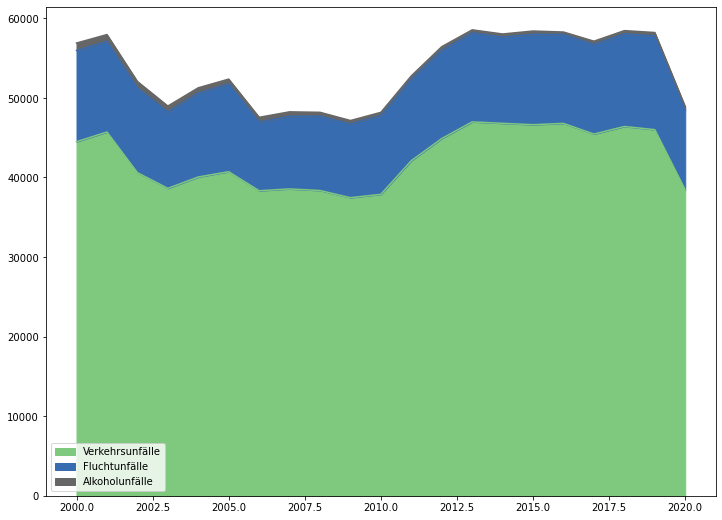

In [21]:
accidents_category.plot(kind='area',colormap='Accent',)
plt.gcf().set_size_inches(12,9)

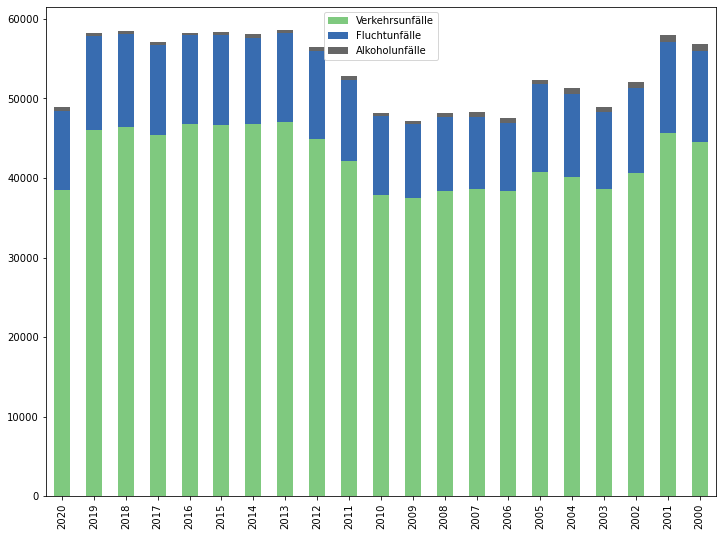

In [20]:
accidents_category.plot(kind='bar', colormap='Accent', stacked= True)
plt.gcf().set_size_inches(12,9)

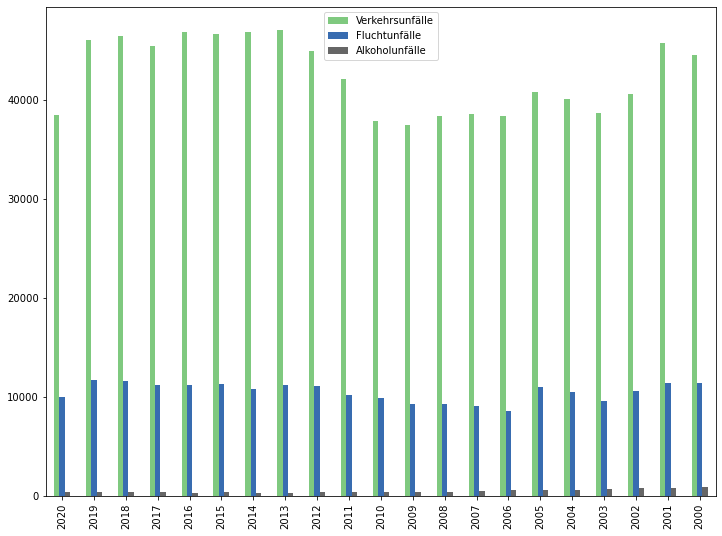

In [19]:
accidents_category.plot(kind='bar', colormap='Accent')
plt.gcf().set_size_inches(12,9)

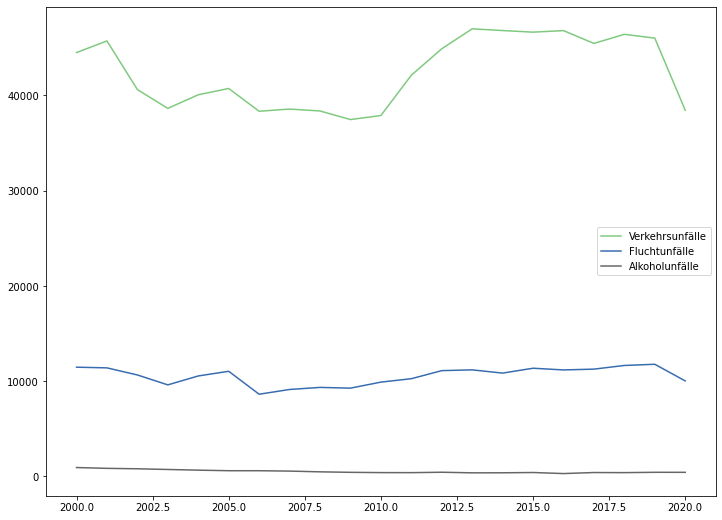

In [18]:
accidents_category.plot(colormap='Accent')
plt.gcf().set_size_inches(12,9)

In [22]:
# Removing null values
data_df_visual = data_df_visual.dropna()

# Remove the 'Summe' from Month column 
data_df_visual = data_df_visual[data_df_visual['Month'] != 'Summe']

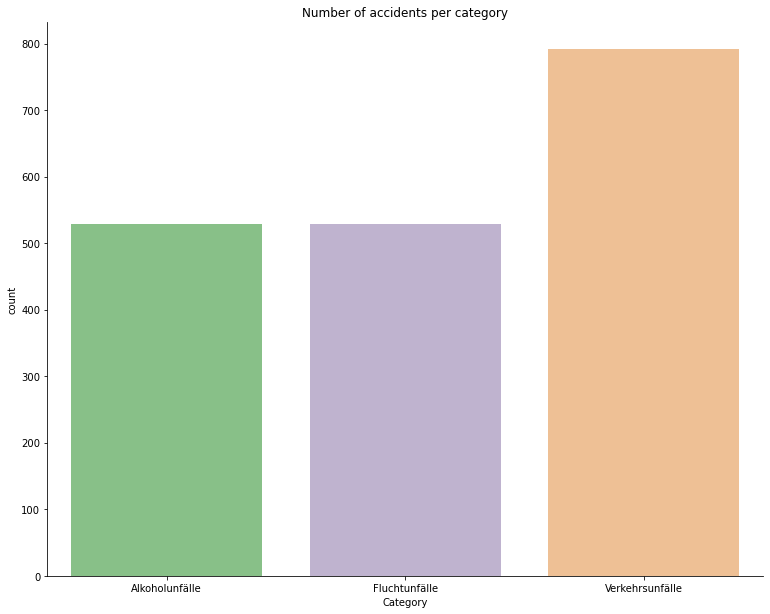

In [23]:
# Plotting Number of accidents per category
plot = sns.catplot(x="Category", kind="count", data=data_df_visual, palette="Accent")
plt.title('Number of accidents per category')
plt.gcf().set_size_inches(12,9)

---

## PROPHET

In [24]:
m = Prophet()
df = pd.read_csv('data/monatszahlen2209_verkehrsunfaelle.csv')
df

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


In [25]:
df=df[df.MONAT != 'Summe'] # Drop unnecessary rows

In [26]:
df=df.sort_values(by ='MONAT',ascending=True) 

In [27]:
# Changing Month Column to numbers between 1-12
df1=df['MONAT'].str.extract('.*(\d{2})', expand = False) 
df1

286     01
882     01
1180    01
2074    01
584     01
        ..
905     12
1799    12
1203    12
11      12
1501    12
Name: MONAT, Length: 1932, dtype: object

In [28]:
df=df.assign(MONAT=df1[:]) 

In [29]:
df

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT
286,Alkoholunfälle,insgesamt,2000,01,78.0,NaN,NaN,NaN,78.0
882,Fluchtunfälle,insgesamt,2000,01,835.0,NaN,NaN,NaN,835.0
1180,Fluchtunfälle,Verletzte und Getötete,2000,01,34.0,NaN,NaN,NaN,34.0
2074,Verkehrsunfälle,Verletzte und Getötete,2000,01,434.0,NaN,NaN,NaN,434.0
584,Alkoholunfälle,Verletzte und Getötete,2000,01,37.0,NaN,NaN,NaN,37.0
...,...,...,...,...,...,...,...,...,...
905,Fluchtunfälle,Verletzte und Getötete,2022,12,NaN,17.0,NaN,NaN,NaN
1799,Verkehrsunfälle,Verletzte und Getötete,2022,12,NaN,340.0,NaN,NaN,NaN
1203,Verkehrsunfälle,insgesamt,2022,12,NaN,2997.0,NaN,NaN,NaN
11,Alkoholunfälle,insgesamt,2022,12,NaN,21.0,NaN,NaN,NaN


In [30]:
# Changing the non-numeric objects into integers
df["MONAT"] = pd.to_numeric(df["MONAT"])

In [31]:
# Changing the non-string objects into strings to be able to filter the df_meta
df[['MONATSZAHL', 'AUSPRÄGUNG']] = df[['MONATSZAHL', 'AUSPRÄGUNG']].astype(pd.StringDtype()) 

In [32]:
# Creating Column for days as datetime needs days as input
df["Tag"] = 15

In [33]:
df.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT,Tag
286,Alkoholunfälle,insgesamt,2000,1,78.0,NaN,NaN,NaN,78.0,15
882,Fluchtunfälle,insgesamt,2000,1,835.0,NaN,NaN,NaN,835.0,15
1180,Fluchtunfälle,Verletzte und Getötete,2000,1,34.0,NaN,NaN,NaN,34.0,15
2074,Verkehrsunfälle,Verletzte und Getötete,2000,1,434.0,NaN,NaN,NaN,434.0,15
584,Alkoholunfälle,Verletzte und Getötete,2000,1,37.0,NaN,NaN,NaN,37.0,15


In [34]:
dict = {'JAHR': 'Year',
        'MONAT': 'Month',
        'Tag': 'Day'}

In [35]:
df.rename(columns=dict,
          inplace=True)

In [36]:
# Obtaining a datetime column to be able to visualise historically the number of accidents 
df['ds']=pd.to_datetime(df[['Year', 'Month', 'Day']])
df

,MONATSZAHL,AUSPRÄGUNG,Year,Month,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT,Day,ds
286,Alkoholunfälle,insgesamt,2000,1,78.0,NaN,NaN,NaN,78.0,15,2000-01-15
882,Fluchtunfälle,insgesamt,2000,1,835.0,NaN,NaN,NaN,835.0,15,2000-01-15
1180,Fluchtunfälle,Verletzte und Getötete,2000,1,34.0,NaN,NaN,NaN,34.0,15,2000-01-15
2074,Verkehrsunfälle,Verletzte und Getötete,2000,1,434.0,NaN,NaN,NaN,434.0,15,2000-01-15
584,Alkoholunfälle,Verletzte und Getötete,2000,1,37.0,NaN,NaN,NaN,37.0,15,2000-01-15
...,...,...,...,...,...,...,...,...,...,...,...
905,Fluchtunfälle,Verletzte und Getötete,2022,12,NaN,17.0,NaN,NaN,NaN,15,2022-12-15
1799,Verkehrsunfälle,Verletzte und Getötete,2022,12,NaN,340.0,NaN,NaN,NaN,15,2022-12-15
1203,Verkehrsunfälle,insgesamt,2022,12,NaN,2997.0,NaN,NaN,NaN,15,2022-12-15
11,Alkoholunfälle,insgesamt,2022,12,NaN,21.0,NaN,NaN,NaN,15,2022-12-15


In [37]:
# Dropping unnecessary columns
df.drop(['VORJAHRESWERT','VERÄND_VORMONAT_PROZENT','VERÄND_VORJAHRESMONAT_PROZENT', 'ZWÖLF_MONATE_MITTELWERT', 'Day'],axis=1 ,inplace=True)
df.head()

,MONATSZAHL,AUSPRÄGUNG,Year,Month,WERT,ds
286,Alkoholunfälle,insgesamt,2000,1,78.0,2000-01-15
882,Fluchtunfälle,insgesamt,2000,1,835.0,2000-01-15
1180,Fluchtunfälle,Verletzte und Getötete,2000,1,34.0,2000-01-15
2074,Verkehrsunfälle,Verletzte und Getötete,2000,1,434.0,2000-01-15
584,Alkoholunfälle,Verletzte und Getötete,2000,1,37.0,2000-01-15


In [38]:
# Renaming the column for later using in the Pipeline
df = df.rename(columns={'WERT': 'y'}) 

In [39]:
df = df.rename(columns={'MONATSZAHL': 'Category'})
df = df.rename(columns={'AUSPRÄGUNG': 'Accident-type'})

In [40]:
df.head()

,Category,Accident-type,Year,Month,y,ds
286,Alkoholunfälle,insgesamt,2000,1,78.0,2000-01-15
882,Fluchtunfälle,insgesamt,2000,1,835.0,2000-01-15
1180,Fluchtunfälle,Verletzte und Getötete,2000,1,34.0,2000-01-15
2074,Verkehrsunfälle,Verletzte und Getötete,2000,1,434.0,2000-01-15
584,Alkoholunfälle,Verletzte und Getötete,2000,1,37.0,2000-01-15


In [41]:
# Setting Accident Type as "insgesamt"
df = df.loc[(df['Accident-type'] == 'insgesamt')]
df

,Category,Accident-type,Year,Month,y,ds
286,Alkoholunfälle,insgesamt,2000,1,78.0,2000-01-15
882,Fluchtunfälle,insgesamt,2000,1,835.0,2000-01-15
1478,Verkehrsunfälle,insgesamt,2000,1,3448.0,2000-01-15
287,Alkoholunfälle,insgesamt,2000,2,53.0,2000-02-15
883,Fluchtunfälle,insgesamt,2000,2,890.0,2000-02-15
...,...,...,...,...,...,...
606,Fluchtunfälle,insgesamt,2022,11,NaN,2022-11-15
1202,Verkehrsunfälle,insgesamt,2022,11,NaN,2022-11-15
607,Fluchtunfälle,insgesamt,2022,12,NaN,2022-12-15
1203,Verkehrsunfälle,insgesamt,2022,12,NaN,2022-12-15


In [42]:
# Creating df for 'Alkoholunfälle' which means "alcohol accidents"
df_alk = df.loc[(df['Category'] == 'Alkoholunfälle')]

# Creating df for 'Fluchtunfälle' which means "escape accidents"
df_flucht = df.loc[(df['Category'] == 'Fluchtunfälle')]

# Creating df for 'Verkehrsunfälle' which means "traffic accidents"
df_verkehr = df.loc[(df['Category'] == 'Verkehrsunfälle')]

In [43]:
df_alk

,Category,Accident-type,Year,Month,y,ds
286,Alkoholunfälle,insgesamt,2000,1,78.0,2000-01-15
287,Alkoholunfälle,insgesamt,2000,2,53.0,2000-02-15
288,Alkoholunfälle,insgesamt,2000,3,73.0,2000-03-15
289,Alkoholunfälle,insgesamt,2000,4,78.0,2000-04-15
290,Alkoholunfälle,insgesamt,2000,5,96.0,2000-05-15
...,...,...,...,...,...,...
7,Alkoholunfälle,insgesamt,2022,8,NaN,2022-08-15
8,Alkoholunfälle,insgesamt,2022,9,NaN,2022-09-15
9,Alkoholunfälle,insgesamt,2022,10,NaN,2022-10-15
10,Alkoholunfälle,insgesamt,2022,11,NaN,2022-11-15


In [44]:
df_flucht

,Category,Accident-type,Year,Month,y,ds
882,Fluchtunfälle,insgesamt,2000,1,835.0,2000-01-15
883,Fluchtunfälle,insgesamt,2000,2,890.0,2000-02-15
884,Fluchtunfälle,insgesamt,2000,3,974.0,2000-03-15
885,Fluchtunfälle,insgesamt,2000,4,834.0,2000-04-15
886,Fluchtunfälle,insgesamt,2000,5,1086.0,2000-05-15
...,...,...,...,...,...,...
603,Fluchtunfälle,insgesamt,2022,8,NaN,2022-08-15
604,Fluchtunfälle,insgesamt,2022,9,NaN,2022-09-15
605,Fluchtunfälle,insgesamt,2022,10,NaN,2022-10-15
606,Fluchtunfälle,insgesamt,2022,11,NaN,2022-11-15


In [45]:
df_verkehr

,Category,Accident-type,Year,Month,y,ds
1478,Verkehrsunfälle,insgesamt,2000,1,3448.0,2000-01-15
1479,Verkehrsunfälle,insgesamt,2000,2,3181.0,2000-02-15
1480,Verkehrsunfälle,insgesamt,2000,3,3783.0,2000-03-15
1481,Verkehrsunfälle,insgesamt,2000,4,3317.0,2000-04-15
1482,Verkehrsunfälle,insgesamt,2000,5,4123.0,2000-05-15
...,...,...,...,...,...,...
1199,Verkehrsunfälle,insgesamt,2022,8,NaN,2022-08-15
1200,Verkehrsunfälle,insgesamt,2022,9,NaN,2022-09-15
1201,Verkehrsunfälle,insgesamt,2022,10,NaN,2022-10-15
1202,Verkehrsunfälle,insgesamt,2022,11,NaN,2022-11-15


In [46]:
import pickle

In [47]:
from prophet import Prophet
m = Prophet()
m.fit(df_alk) # alcohol accidents

# Fitting monthly data and making monthly forecasts for the next 12 months
future = m.make_future_dataframe(periods=12, freq='30d')
forecast = m.predict(future)

14:23:56 - cmdstanpy - INFO - Chain [1] start processing
14:23:57 - cmdstanpy - INFO - Chain [1] done processing


In [48]:
future

,ds
0,2000-01-15
1,2000-02-15
2,2000-03-15
3,2000-04-15
4,2000-05-15
...,...
283,2023-08-12
284,2023-09-11
285,2023-10-11
286,2023-11-10


In [49]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-15,76.018792,56.231250,75.457836,76.018792,76.018792,-11.062028,-11.062028,-11.062028,-11.062028,-11.062028,-11.062028,0.0,0.0,0.0,64.956764
1,2000-02-15,75.662536,53.236379,72.524738,75.662536,75.662536,-13.481057,-13.481057,-13.481057,-13.481057,-13.481057,-13.481057,0.0,0.0,0.0,62.181480
2,2000-03-15,75.329265,57.580355,76.902560,75.329265,75.329265,-7.858323,-7.858323,-7.858323,-7.858323,-7.858323,-7.858323,0.0,0.0,0.0,67.470941
3,2000-04-15,74.973009,59.722143,79.336034,74.973009,74.973009,-5.682399,-5.682399,-5.682399,-5.682399,-5.682399,-5.682399,0.0,0.0,0.0,69.290610
4,2000-05-15,74.628245,71.153189,90.769466,74.628245,74.628245,6.013427,6.013427,6.013427,6.013427,6.013427,6.013427,0.0,0.0,0.0,80.641673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2023-08-12,32.682126,23.683574,43.743572,32.355345,33.017531,1.342921,1.342921,1.342921,1.342921,1.342921,1.342921,0.0,0.0,0.0,34.025048
284,2023-09-11,32.681213,33.752854,53.446487,32.324421,33.038728,10.266850,10.266850,10.266850,10.266850,10.266850,10.266850,0.0,0.0,0.0,42.948063
285,2023-10-11,32.680299,31.659071,51.945225,32.292807,33.070408,9.226453,9.226453,9.226453,9.226453,9.226453,9.226453,0.0,0.0,0.0,41.906753
286,2023-11-10,32.679386,24.149462,43.711100,32.259701,33.100213,1.342269,1.342269,1.342269,1.342269,1.342269,1.342269,0.0,0.0,0.0,34.021655


In [52]:
# saving as bin file
with open('models/forecast_model.bin', 'wb') as fout:
    pickle.dump(m, fout)

In [53]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

,ds,yhat,yhat_lower,yhat_upper
264,2022-01-15,21.330643,11.277233,31.050493
265,2022-02-15,20.208739,10.191215,30.314066
266,2022-03-15,24.468485,15.290627,34.462987
267,2022-04-15,28.374205,18.327500,37.620179
268,2022-05-15,37.548571,27.856070,47.661721
269,2022-06-15,37.264553,27.868208,47.195998
270,2022-07-15,46.053105,35.708102,55.854839
271,2022-08-15,36.370416,26.774519,45.682642
272,2022-09-15,47.266948,36.885524,57.433461
273,2022-10-15,36.837182,28.355180,46.188233


---

### Plotting

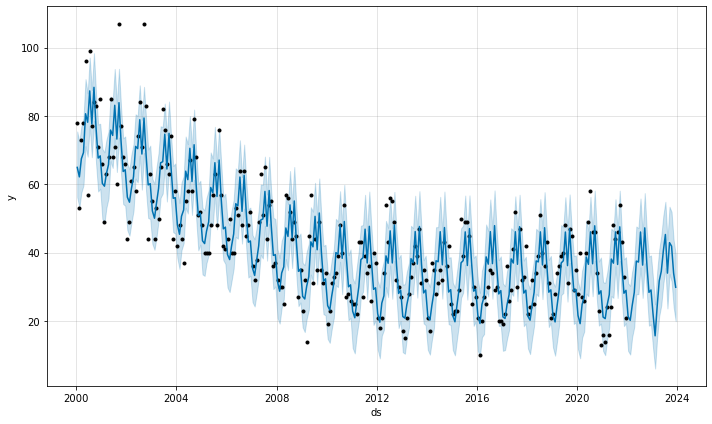

In [54]:
fig1 = m.plot(forecast)

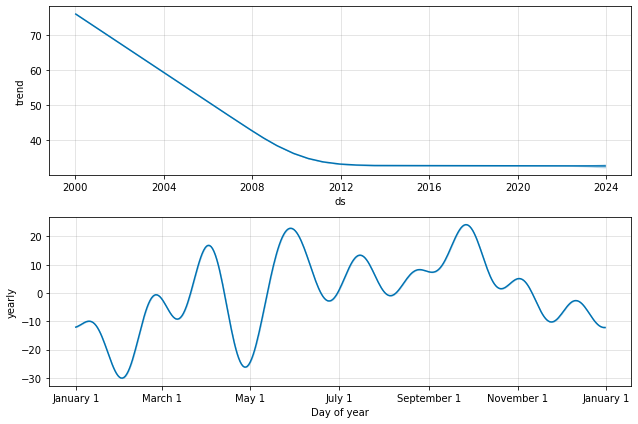

In [55]:
fig2 = m.plot_components(forecast)

In [56]:
# Making predictions for Escape Accidents

In [57]:
m_2 = Prophet()
m_2.fit(df_flucht) # escape accidents

# Fitting monthly data and making monthly forecasts for the next 12 months
future_2 = m_2.make_future_dataframe(periods=12, freq='30d')
forecast_2 = m_2.predict(future_2)

14:28:02 - cmdstanpy - INFO - Chain [1] start processing
14:28:02 - cmdstanpy - INFO - Chain [1] done processing


In [58]:
# saving as bin file
with open('models/forecast_model_escape.bin', 'wb') as fout:
    pickle.dump(m_2, fout)

In [59]:
forecast_2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

,ds,yhat,yhat_lower,yhat_upper
264,2022-01-15,764.125242,638.571518,884.521775
265,2022-02-15,786.305454,658.861628,913.759550
266,2022-03-15,900.189927,766.029277,1020.513635
267,2022-04-15,894.383370,764.961155,1011.951909
268,2022-05-15,911.092270,785.127074,1029.947706
269,2022-06-15,909.611394,787.982351,1030.095411
270,2022-07-15,1019.034819,895.531551,1141.014993
271,2022-08-15,817.002564,691.083462,940.703906
272,2022-09-15,963.418426,844.111748,1072.075134
273,2022-10-15,1008.488614,886.945193,1133.193076


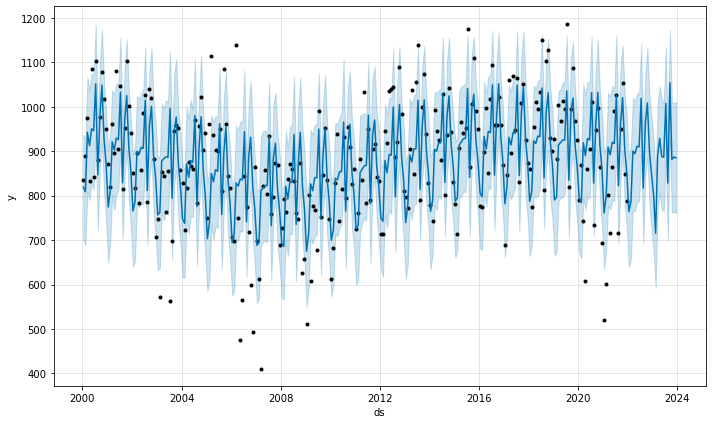

In [60]:
fig2 = m_2.plot(forecast_2)

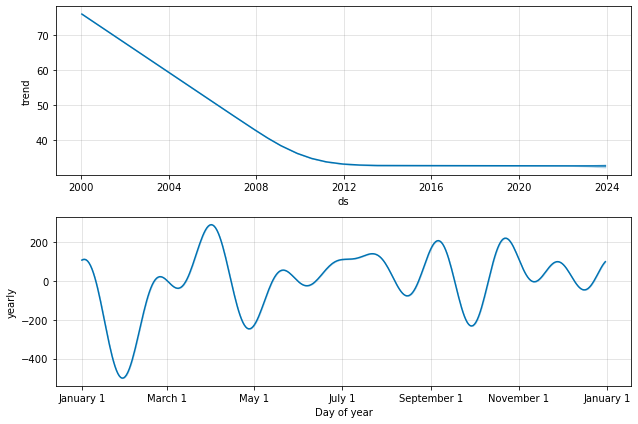

In [61]:
fig2 = m_2.plot_components(forecast)

In [62]:
# Making predictions for Traffic Accidents
m_3 = Prophet()
m_3.fit(df_verkehr) # traffic accidents

# Fitting monthly data and making monthly forecasts for the next 12 months
future_3 = m_3.make_future_dataframe(periods=12, freq='30d')
forecast_3 = m_3.predict(future_3)

14:28:52 - cmdstanpy - INFO - Chain [1] start processing
14:28:52 - cmdstanpy - INFO - Chain [1] done processing


In [63]:
# saving as bin file
with open('models/forecast_model_traffic.bin', 'wb') as fout:
    pickle.dump(m_3, fout)

In [64]:
forecast_3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

,ds,yhat,yhat_lower,yhat_upper
264,2022-01-15,2720.676366,2395.940550,3048.460727
265,2022-02-15,2793.967360,2464.454730,3121.565069
266,2022-03-15,3200.904595,2842.009694,3511.058158
267,2022-04-15,3102.475218,2774.956026,3426.993374
268,2022-05-15,3344.995196,3019.867938,3662.364359
269,2022-06-15,3196.576900,2859.261122,3544.076458
270,2022-07-15,3728.046455,3401.142523,4054.141278
271,2022-08-15,2765.836541,2429.331395,3075.844811
272,2022-09-15,3374.661199,3033.010382,3723.638093
273,2022-10-15,3573.187637,3239.110175,3875.649939


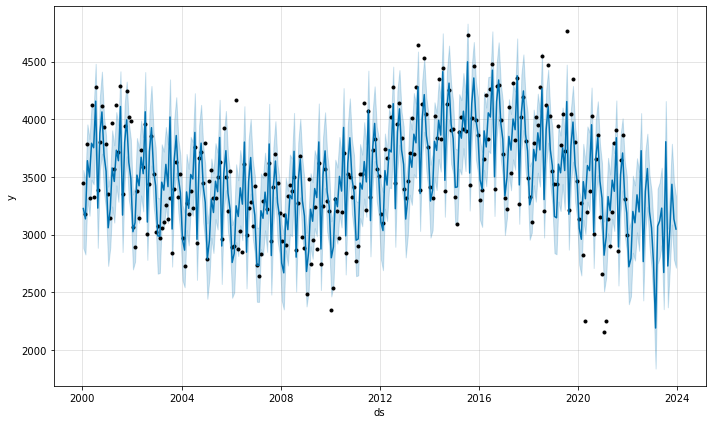

In [65]:
fig3 = m_3.plot(forecast_3)

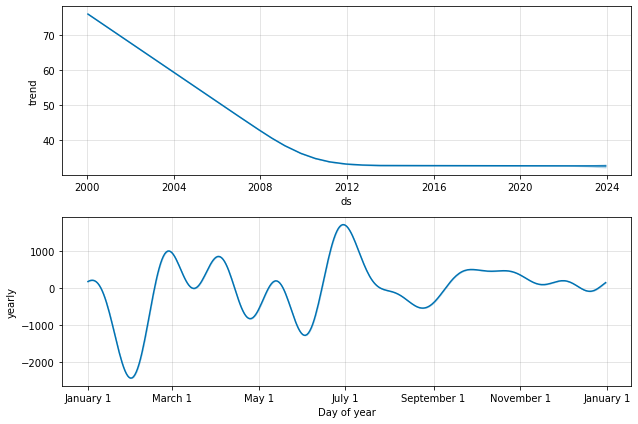

In [66]:
fig2 = m_3.plot_components(forecast)

---